In [1]:
import pandas as pd
import numpy as np
import acquire
import prepare

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

# Data Acquire Exercises

## 1. Use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, df_iris, from this data.

print the first 3 rows  
print the number of rows and columns (shape)  
print the column names  
print the data type of each column  
print the summary statistics for each of the numeric variables  
Would you recommend rescaling the data based on these statistics?

In [ ]:
df_iris = data('iris')
df_iris.head(3)

In [ ]:
df_iris.shape

In [ ]:
df_iris.columns

In [ ]:
df_iris.info()

In [ ]:
df_iris.describe()

In [ ]:
# does not look like data needs to be rescaled based on the data, measurements appear to be in comparable units

## 2.Read the Table1_CustDetails table from the Excel_Exercises.xlsx file into a dataframe named df_excel.

assign the first 100 rows to a new dataframe, df_excel_sample  
print the number of rows of your original dataframe  
print the first 5 column names  
print the column names that have a data type of object  
compute the range for each of the numeric variables.

In [ ]:
df_excel_sample = pd.read_excel('Spreadsheets_Exercises_Solutions.xlsx', nrows=100, header=1)
df_excel_sample.head()

In [ ]:
df_excel_sample.shape

In [ ]:
df_excel_sample.iloc[:0, :5]

In [ ]:
df_excel_sample.columns.to_series().groupby(df_excel_sample.dtypes == 'object').groups

In [ ]:
df_excel_sample.describe()

## 3. Read the data from this google sheet into a dataframe, df_google

print the first 3 rows  
print the number of rows and columns  
print the column names  
print the data type of each column  
print the summary statistics for each of the numeric variables  
print the unique values for each of your categorical variables

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'

In [ ]:
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)
df_google.head(3)

In [ ]:
df_google.shape

In [ ]:
df_google.columns

In [ ]:
df_google.info()

In [ ]:
df_google.describe()

In [ ]:
df_google.nunique()

# Data Prep Exercises

### 1. Iris Data

Use the function defined in acquire.py to load the iris data.  
Drop the species_id and measurement_id columns.  
Rename the species_name column to just species.  
Encode the species name using a sklearn label encoder. Research the inverse_transform method of the label encoder.   How might this be useful?  
Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [ ]:
# Use the function defined in acquire.py to load the iris data
df = acquire.get_iris_data()
df.head()

In [ ]:
# Drop the species_id and measurement_id columns
irisdf = irisdf.drop(columns=['species_id', 'measurement_id'])

In [ ]:
# Rename the species_name column to just species
irisdf = irisdf.rename(columns={'species_name': 'species'})
irisdf.head()

In [ ]:
# encoder = LabelEncoder()

# encoder.fit(train.embark_town)
# train.encoded = encoder.transform(train.embark_town)
# test.encoded = encoder.transform(test.embark_town)

# print(type(train.encoded))
# train.encoded[0:10]

In [ ]:
# this is from the curriculum, but I don't understand how to attach this back to the original df
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

encoder.fit(irisdf.species)
irisdf.encoded = encoder.transform(irisdf.species)
print(type(irisdf.encoded))
irisdf.encoded

In [ ]:
irisdf.head()

The inverse_transform(y)
Transform labels back to original encoding.

In [ ]:
# this method is from the lesson
#df_dummies = pd.get_dummies(df[['sex', 'embark_town']], drop_first=[True, True])
#df = pd.concat([df, df_dummies], axis=1)

irisdf_dummies = pd.get_dummies(irisdf[['species']], drop_first=True)
irisdf = pd.concat([irisdf, irisdf_dummies], axis=1)
irisdf.head()

In [ ]:
# Create a function named prep_iris that accepts the untransformed iris data, 
# and returns the data with the transformations above applied

def prep_iris(df):
    # Drop the species_id and measurement_id columns
    df = df.drop(columns=['species_id', 'measurement_id'])
    
    # Rename the species_name column to just species
    df = df.rename(columns={'species_name': 'species'})
    
    # encode the species column
    df_dummies = pd.get_dummies(df[['species']], drop_first=True)
    df = pd.concat([df, df_dummies], axis=1)
    
    return df

irisdf = prep_iris(df)

In [ ]:
irisdf.head()

### 2. Titanic Data

Use the function you defined in acquire.py to load the titanic data set.  
Handle the missing values in the embark_town and embarked columns.  
Remove the deck column.  
Use a label encoder to transform the embarked column.  
Scale the age and fare columns using a min max scaler. Why might this be beneficial? When might you not want to do this?  
Fill the missing values in age. The way you fill these values is up to you. Consider the tradeoffs of different methods.  
Create a function named prep_titanic that accepts the untransformed titanic data, and returns the data with the transformations above applied.

In [ ]:
# Use the function defined in acquire.py to load the titanic data
df = acquire.get_titanic_data()
df.head()

In [ ]:
df.info()

In [ ]:
# Drop the 2 rows with missing values in embark_town as in lesson
# drop missing observations of embark town
df = df[~df.embark_town.isnull()]

# could fill with mode value instead, but it's 2 rows, so dropped them instead of filling with mode

In [ ]:
# use the pd.get_dummies as in lesson to encode embark_town column
# note cirriculum does not specify to do this for sex, but lesson said to
# have to do this first, then can add sex to list of columns to drop
df_dummies = pd.get_dummies(df[['sex', 'embark_town']], drop_first=True)
df = pd.concat([df, df_dummies], axis=1)

In [ ]:
# Drop the embarked and deck columns
# lesson notes add dropping class and sex after dealing with creatting dummies
df = df.drop(columns=['embarked', 'deck', 'passenger_id', 'class', 'sex'])

In [ ]:
df.head()

In [ ]:
df.info()

Scale the age and fare columns using a min max scaler. Why might this be beneficial? When might you not want to do this?  

Fare column notes:   
- there are 3 first class fares at hightest value all embarking at same town, next lower first class fares embark at different town so value is consistent with distance/time of voyage  
- there are 15 values of 0 all for males embarking at Southampton with varying pclass, these should be filled with mean by pclass where embark_town == Southampton 

Scale the age and fare columns using a min max scaler. Why might this be beneficial? When might you not want to do this?  

Age column notes:  

- for 1st run will fill age column with median value of train dataset  
- next run through would attempt to create Adult/Child value based on alone, age, parch, and sibsp relationships
then drop age column and evaluate on Adult/Child instead


In [ ]:
# need to split data to get median age based on train data only
# copying from curriculum
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# copying from curriculum
train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.survived)
train, validate = train_test_split(train_validate, test_size=.3, random_state=123, stratify=train_validate.survived)


In [ ]:
train.head()

In [ ]:
# create imputer object based on median strategy for age
imputer = SimpleImputer(strategy = 'median')

In [ ]:
# fit the imputer to the data in the train dataset to find the median age in that set
imputer = imputer.fit(train[['age']])

In [ ]:
# use transform to fill the train dataset with the median age, repeat for validate and test datasets
train[['age']] = imputer.transform(train[['age']])

In [ ]:
train.isnull().sum()

In [ ]:
validate[['age']] = imputer.transform(validate[['age']])

In [ ]:
validate.isnull().sum()

In [ ]:
test[['age']] = imputer.transform(test[['age']])

In [ ]:
test.isnull().sum()

In [ ]:
# why do you use imputer.fit_transform on validate? shouldn't it be imputer.transform like test is?
def impute(train, validate, test, my_strategy, column_list):
    imputer = SimpleImputer(strategy=my_strategy)
    train[column_list] = imputer.fit_transform(train[column_list])
    validate[column_list] = imputer.fit_transform(validate[column_list])
    test[column_list] = imputer.transform(test[column_list])
    return train, validate, test

### Transfer functions to prepare.py file

In [ ]:
def prep_titanic(df):
    # drop missing observations of embark town
    df = df[~df.embark_town.isnull()]
    
    # use the pd.get_dummies as in lesson to encode embark_town column
    df_dummies = pd.get_dummies(df[['embark_town']], drop_first=True)
    df = pd.concat([df, df_dummies], axis=1)
    
    # Drop the embarked and deck columns
    df = df.drop(columns=['embarked', 'deck', 'passenger_id', 'class', 'sex'])
    
    # split the data
    split_dataset(df)
    
    # handle missing ages
    impute(train, validate, test, 'median', ['age'])
    

In [ ]:
def split_dataset(df):
    train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df.survived)
    train, validate = train_test_split(train_validate, test_size=.3, random_state=123, stratify=train_validate.survived)
    return train, validate, test


In [ ]:
def impute(train, validate, test, my_strategy, column_list):
    imputer = SimpleImputer(strategy=my_strategy)
    train[column_list] = imputer.fit_transform(train[column_list])
    validate[column_list] = imputer.transform(validate[column_list])
    test[column_list] = imputer.transform(test[column_list])
    return train, validate, test

# Zach's requested Exercises
### Use Titanic Dataset and tweak demonstrated techniques from lesson

In [2]:
df = acquire.get_titanic_data()
df = df.drop(columns=['deck', 'passenger_id', 'embarked', 'class'])
# age seems to be a key metric when looking at survival based on previous exploration, so I don't want to drop null
# df = df[~ df.age.isna()]
df = df[~ df.embark_town.isna()] # this only drops 2 obervations

df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embark_town      0
alone            0
dtype: int64

In [ ]:
# note double check if there are still 15 values of $0 in fares
farenulls = df[df.fare == 0]
farenulls
# yes, these values should be filled based on the average fare for other passengers in the same pclass
# and embarking from same town
# calculate value based on train data, then fill to all 3 datasets

In [ ]:
# check outlier fares of $500 plus, are these valid?
highfare = df[df.embark_town == "Queenstown"].sort_values(by=['embark_town', 'fare'], ascending=False)
highfare
# all 3 embarked in Cherbourg which was 1st loading port, all 3 are first class
# there are other first class tickets for same port that are in the same range as first class passengers
# that borarded in Southampton (the 2nd port), passengers boarding at the 3rd port Queenstown paid less
# keep high fares

In [ ]:
# after split, calculate fares and fill, eval age nulls

In [3]:
train, validate, test = prepare.split_titanic_dataset(df)

#train = train[['survived', 'pclass', 'sex', 'age', 'fare', 'embark_town', 'alone']]

train.head()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 583 to 553
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     497 non-null    int64  
 1   pclass       497 non-null    int64  
 2   sex          497 non-null    object 
 3   age          400 non-null    float64
 4   sibsp        497 non-null    int64  
 5   parch        497 non-null    int64  
 6   fare         497 non-null    float64
 7   embark_town  497 non-null    object 
 8   alone        497 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 38.8+ KB


In [4]:
# check for null fares
farenulls = train[train.fare == 0]
farenulls

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
277,0,2,male,NaN,0,0,0.0,Southampton,1
597,0,3,male,49.0,0,0,0.0,Southampton,1
466,0,2,male,NaN,0,0,0.0,Southampton,1
633,0,1,male,NaN,0,0,0.0,Southampton,1
822,0,1,male,38.0,0,0,0.0,Southampton,1
179,0,3,male,36.0,0,0,0.0,Southampton,1
481,0,2,male,NaN,0,0,0.0,Southampton,1
271,1,3,male,25.0,0,0,0.0,Southampton,1


In [5]:
# fill $0 fare values
# calculate average fare by class for 
#student_df.groupby(['Gender', 'Handed']).Ageyears.agg(['mean', 'median'])
train.groupby(['embark_town', 'pclass']).fare.agg('mean')

embark_town  pclass
Cherbourg    1         111.320998
             2          24.919275
             3          11.638178
Queenstown   1          90.000000
             2          12.350000
             3          10.262740
Southampton  1          69.826761
             2          21.170153
             3          14.050705
Name: fare, dtype: float64

In [6]:
train['fare'] = np.where((train.fare == 0.0) & (train.pclass == 1), 69.83, train.fare)
train['fare'] = np.where((train.fare == 0.0) & (train.pclass == 2), 21.17, train.fare)
train['fare'] = np.where((train.fare == 0.0) & (train.pclass == 3), 14.05, train.fare)
train.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
583,0,1,male,36.0,0,0,40.1250,Cherbourg,1
337,1,1,female,41.0,0,0,134.5000,Cherbourg,1
50,0,3,male,7.0,4,1,39.6875,Southampton,0
218,1,1,female,32.0,0,0,76.2917,Cherbourg,1
31,1,1,female,NaN,1,0,146.5208,Cherbourg,0
308,0,2,male,30.0,1,0,24.0000,Cherbourg,0
314,0,2,male,43.0,1,1,26.2500,Southampton,0
883,0,2,male,28.0,0,0,10.5000,Southampton,1
459,0,3,male,NaN,0,0,7.7500,Queenstown,1
180,0,3,female,NaN,8,2,69.5500,Southampton,0


In [7]:
# check for null fares
farenulls = train[train.fare == 0]
farenulls

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone


In [8]:
#fill age values where possible
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone
583,0,1,male,36.0,0,0,40.1250,Cherbourg,1
337,1,1,female,41.0,0,0,134.5000,Cherbourg,1
50,0,3,male,7.0,4,1,39.6875,Southampton,0
218,1,1,female,32.0,0,0,76.2917,Cherbourg,1
31,1,1,female,NaN,1,0,146.5208,Cherbourg,0


In [9]:
# if traveling alone = adult
# fam_df['age_group'] = np.where(fam_df.age > 18, 'adult', 'minor')
train['age_group'] = np.where(train.alone == 1, 'adult', 'unknown')
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,age_group
583,0,1,male,36.0,0,0,40.1250,Cherbourg,1,adult
337,1,1,female,41.0,0,0,134.5000,Cherbourg,1,adult
50,0,3,male,7.0,4,1,39.6875,Southampton,0,unknown
218,1,1,female,32.0,0,0,76.2917,Cherbourg,1,adult
31,1,1,female,NaN,1,0,146.5208,Cherbourg,0,unknown


In [10]:
# how many age_group unknown?
train.age_group.value_counts()

adult      302
unknown    195
Name: age_group, dtype: int64

In [11]:
# if age over 16 = adult
train['age_group'] = np.where(train.age > 16, 'adult', train.age_group)
train.head()

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,age_group
583,0,1,male,36.0,0,0,40.1250,Cherbourg,1,adult
337,1,1,female,41.0,0,0,134.5000,Cherbourg,1,adult
50,0,3,male,7.0,4,1,39.6875,Southampton,0,unknown
218,1,1,female,32.0,0,0,76.2917,Cherbourg,1,adult
31,1,1,female,NaN,1,0,146.5208,Cherbourg,0,unknown


In [12]:
# how many age_group unknown?
train.age_group.value_counts()

adult      426
unknown     71
Name: age_group, dtype: int64

In [13]:
# if age 16 or under = child
train['age_group'] = np.where(train.age <= 16, 'child', train.age_group)
train.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,age_group
583,0,1,male,36.0,0,0,40.1250,Cherbourg,1,adult
337,1,1,female,41.0,0,0,134.5000,Cherbourg,1,adult
50,0,3,male,7.0,4,1,39.6875,Southampton,0,child
218,1,1,female,32.0,0,0,76.2917,Cherbourg,1,adult
31,1,1,female,NaN,1,0,146.5208,Cherbourg,0,unknown
308,0,2,male,30.0,1,0,24.0000,Cherbourg,0,adult
314,0,2,male,43.0,1,1,26.2500,Southampton,0,adult
883,0,2,male,28.0,0,0,10.5000,Southampton,1,adult
459,0,3,male,NaN,0,0,7.7500,Queenstown,1,adult
180,0,3,female,NaN,8,2,69.5500,Southampton,0,unknown


In [14]:
# how many age_group unknown?
train.age_group.value_counts()
# this is probably as low as possible to get missing values, docs indicate that some children were traveling
# with a nanny, but that would have been listed as parch = 0

adult      418
child       55
unknown     24
Name: age_group, dtype: int64

In [15]:
# drop unknown age_group rows and age column
# df[df.name != 'Tina']
train = train[train.age_group != 'unknown']
train = train.drop(columns='age')
train.age_group.value_counts()

adult    418
child     55
Name: age_group, dtype: int64

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 473 entries, 583 to 553
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     473 non-null    int64  
 1   pclass       473 non-null    int64  
 2   sex          473 non-null    object 
 3   sibsp        473 non-null    int64  
 4   parch        473 non-null    int64  
 5   fare         473 non-null    float64
 6   embark_town  473 non-null    object 
 7   alone        473 non-null    int64  
 8   age_group    473 non-null    object 
dtypes: float64(1), int64(5), object(3)
memory usage: 37.0+ KB


In [17]:
# NOTE: this is the full dataset, not the split
df.survived.value_counts()

0    549
1    340
Name: survived, dtype: int64

In [18]:
# NOTE: this is the full dataset, not the split
df.survived.mean() # % of 1s in the data

0.38245219347581555

Text(0.5, 0, 'Survived')

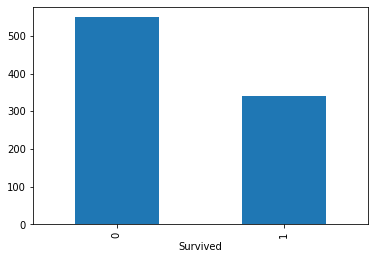

In [19]:
# NOTE: this is the full dataset, not the split
# Explore target variable by itself
df.survived.value_counts().plot.bar()
plt.xlabel('Survived')

In [20]:
# target variable in the TRAIN dataset
survival_rate = train.survived.mean()
survival_rate

0.3784355179704017

In [21]:
# Exploring the target by other categorical variables
train.groupby('sex').survived.mean()

sex
female    0.769737
male      0.193146
Name: survived, dtype: float64

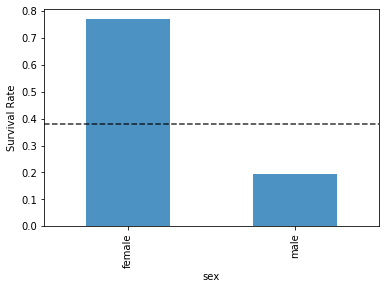

In [22]:
train.groupby('sex').survived.mean().plot.bar(alpha=.8)
plt.ylabel('Survival Rate')
plt.hlines(survival_rate, *plt.xlim(), ls='--', alpha=.8)

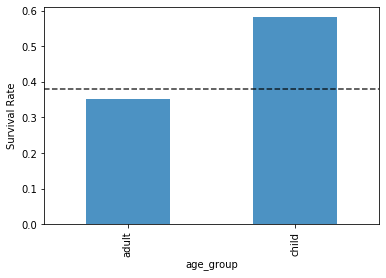

In [25]:
train.groupby('age_group').survived.mean().plot.bar(alpha=.8)
plt.ylabel('Survival Rate')
plt.hlines(survival_rate, *plt.xlim(), ls='--', alpha=.8)

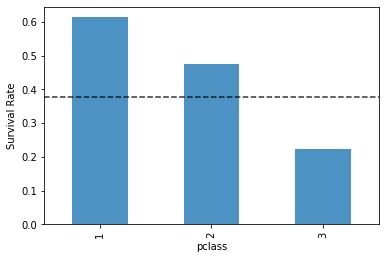

In [26]:
train.groupby('pclass').survived.mean().plot.bar(alpha=.8)
plt.ylabel('Survival Rate')
plt.hlines(survival_rate, *plt.xlim(), ls='--', alpha=.8)

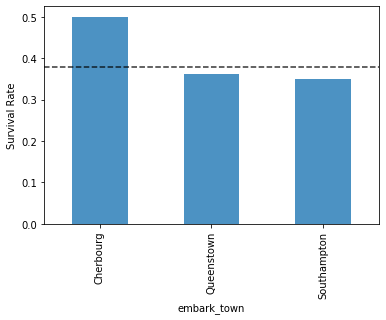

In [27]:
train.groupby('embark_town').survived.mean().plot.bar(alpha=.8)
plt.ylabel('Survival Rate')
plt.hlines(survival_rate, *plt.xlim(), ls='--', alpha=.8)

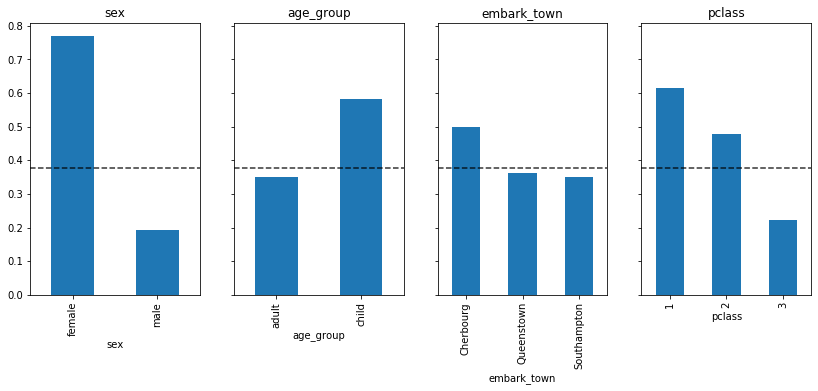

In [28]:
features = ['sex', 'age_group', 'embark_town', 'pclass']

fig, axs = plt.subplots(1, 4, figsize=(14, 5), sharey=True)

for i, feature in enumerate(features):
    train.groupby(feature).survived.mean().plot.bar(ax=axs[i])
    axs[i].set(title=feature)
    axs[i].hlines(survival_rate, *axs[i].get_xlim(), ls='--', alpha=.8)

In [29]:
pd.crosstab(train.survived, train.sex)

sex,female,male
survived,,
0,35,259
1,117,62


In [30]:
pd.crosstab(train.survived, train.age_group)

age_group,adult,child
survived,,
0,271,23
1,147,32


In [31]:
# normalize=True gets perentages instead of numbers
pd.crosstab(train.embark_town, train.survived, margins=True, normalize=True)

survived,0,1,All
embark_town,,,
Cherbourg,0.093023,0.093023,0.186047
Queenstown,0.048626,0.027484,0.076110
Southampton,0.479915,0.257928,0.737844
All,0.621564,0.378436,1.000000


In [32]:
# normalize=True gets perentages instead of numbers
pd.crosstab(train.pclass, train.survived, margins=True, normalize=True)

survived,0,1,All
pclass,,,
1,0.097252,0.154334,0.251586
2,0.118393,0.107822,0.226216
3,0.405920,0.116279,0.522199
All,0.621564,0.378436,1.000000


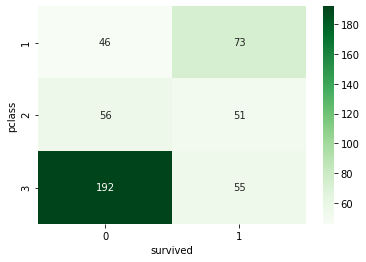

In [34]:
ctab = pd.crosstab(train['pclass'], train.survived)
sns.heatmap(ctab, cmap='Greens', annot=True, fmt=',')

Comparing 3 categorical variables  
(where 1 is a boolean)  
survived, sex, class  

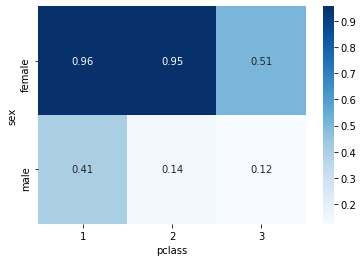

In [35]:
sns.heatmap(train.pivot_table('survived', 'sex', 'pclass'), cmap='Blues', annot=True)

94% of the female passengers in first class surived  
21% of the male passengers in second class survived  
46% of the female passengers in third class survived  
We could use this same strategy to compare 2 categories and a continuous var too.  

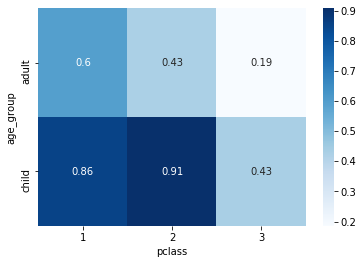

In [36]:
sns.heatmap(train.pivot_table('survived', 'age_group', 'pclass'), cmap='Blues', annot=True)

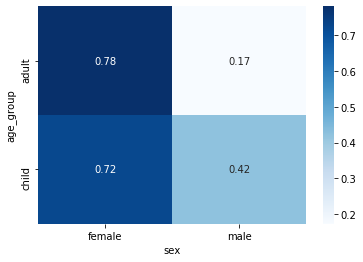

In [37]:
sns.heatmap(train.pivot_table('survived', 'age_group', 'sex'), cmap='Blues', annot=True)

### Explore target + cont. vars  
Looking at 2 variables, one continuous, one categorical.

In [38]:
train.groupby('survived').fare.describe()

,count,mean,std,min,25%,50%,75%,max
survived,,,,,,,,
0,294.0,23.040372,34.115899,6.4375,7.8958,9.54375,26.0000,263.0000
1,179.0,50.812734,75.666550,6.9750,12.5625,26.00000,61.4896,512.3292


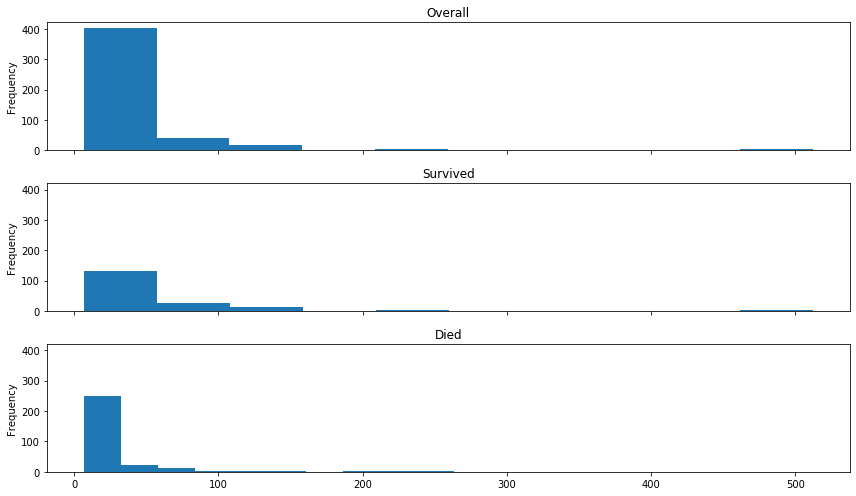

In [39]:
fig, axs = plt.subplots(3, 1, figsize=(12, 7), sharex=True, sharey=True)

train.fare.plot.hist(ax=axs[0], title='Overall')
train[train.survived == 1].fare.plot.hist(ax=axs[1], title='Survived')
train[train.survived == 0].fare.plot.hist(ax=axs[2], title='Died')
fig.tight_layout()

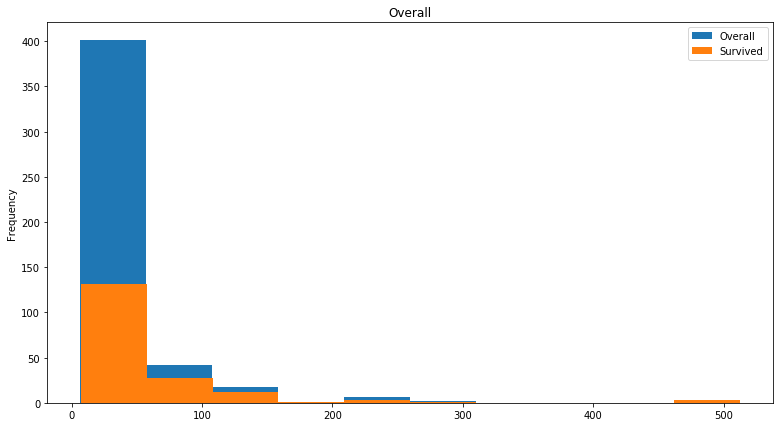

In [40]:
ax = train.fare.plot.hist(title='Overall', figsize=(13, 7), label='Overall')
train[train.survived == 1].fare.plot.hist(ax=ax, label='Survived')
plt.legend()

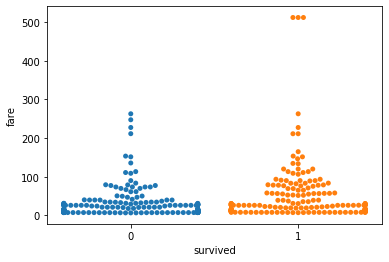

In [41]:
sns.swarmplot(data=train, y='fare', x='survived')

We can compare 1 continuous and 2 categorical variables with swarmplot as well  
E.g.  
class (categorical)  
survived (categorical)  
fare (continuous)  

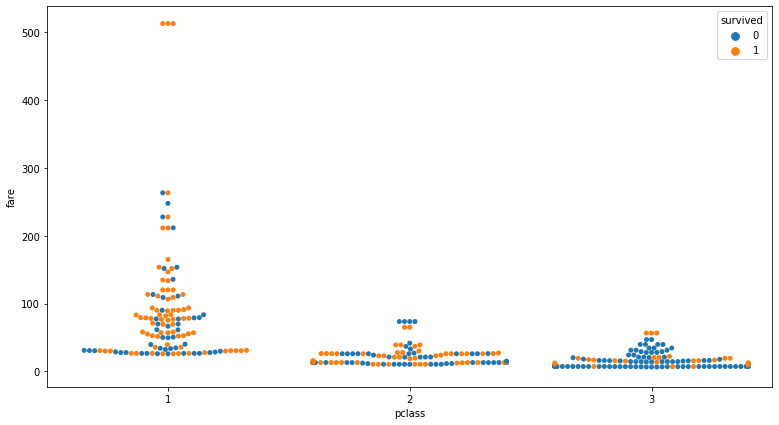

In [43]:
plt.figure(figsize=(13, 7))
sns.swarmplot(data=train, y='fare', x='pclass', hue='survived')

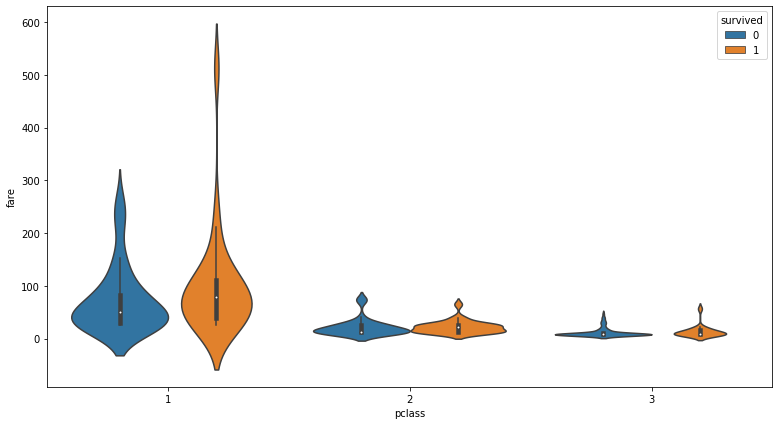

In [44]:
plt.figure(figsize=(13, 7))
sns.violinplot(data=train, y='fare', x='pclass', hue='survived')

# Data Exploration Exercises
### Curriculum Exercises

Use the iris dataset.   
1. Split your data into train, test, and validate samples.

In [ ]:
iris = acquire.get_iris_data()
iris.head()

In [ ]:
iris = iris.drop(columns=['species_id', 'measurement_id'])
iris

In [ ]:
iris = iris.rename(columns={'species_name': 'species'})
iris.head()

In [ ]:
iristrain, irisvalidate, iristest = prepare.split_iris_dataset(iris)
iristrain.head()

2. Create a swarmplot using a melted dataframe of all your numeric variables.   
The x-axis should be the variable name, the y-axis is the measure.   
Add another dimension using color to represent species.   
Document takeaways from this visualization.

In [ ]:
irismelt = iristrain.melt(id_vars='species')
irismelt

In [ ]:
# sns.swarmplot(x="variable", y="value", data=melted_train, hue="species", palette="Set2")
#melted_iris = train.melt('species', ['sepal_length','sepal_width','petal_length','petal_width'])
swarmplot = sns.swarmplot(x='variable', y='value', data=irismelt, hue='species')
swarmplot

Document takeaways from this visualization  

- setosa petal length and petal width are distinct from the other 2 species
- petal length and petal width are distinct for versicolor and virginica but the range is closer together
- there is substaintial overlap in sepal width between all 3 species
- there is minimal overlap , but still some overlap, in sepal length for all 3 species


3. Create 4 subplots (2 rows x 2 columns) of scatterplots.  
    - sepal_length x sepal_width  
    - petal_length x petal_width  
    - sepal_area x petal_area  
    - sepal_length x petal_length    

What are your takeaways?

In [ ]:
# fig, axs = plt.subplots(3, 1, figsize=(12, 7), sharex=True, sharey=True)

# train.age.plot.hist(ax=axs[0], title='Overall')
# train[train.survived == 1].age.plot.hist(ax=axs[1], title='Survived')
# train[train.survived == 0].age.plot.hist(ax=axs[2], title='Died')
# fig.tight_layout()

In [ ]:
iristrain['sepal_area'] = iristrain.sepal_length * iristrain.sepal_width
iristrain['petal_area'] = iristrain.petal_length * iristrain.petal_width
iristrain.head()

In [ ]:
# fig, axs = plt.subplots(3, 1, figsize=(12, 7), sharex=True, sharey=True)

# train.age.plot.hist(ax=axs[0], title='Overall')
# train[train.survived == 1].age.plot.hist(ax=axs[1], title='Survived')
# train[train.survived == 0].age.plot.hist(ax=axs[2], title='Died')
# fig.tight_layout()

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(16, 9), sharex=True, sharey=True)

plt.subplot(2,2,1)
plt.scatter(iristrain.sepal_length, iristrain.sepal_width)
plt.title('sepal length by sepal width')

plt.subplot(2,2,2)
plt.scatter(iristrain.petal_length, iristrain.petal_width)
plt.title('petal length by petal width')

plt.subplot(2,2,3)
plt.scatter(iristrain.sepal_area, iristrain.petal_area)
plt.title('sepal area by petal area')

plt.subplot(2,2,4)
plt.scatter(iristrain.sepal_length, iristrain.petal_length)
plt.title('sepal length by petal length')

plt.show()

What are your takeaways?  

- sepal length and sepal width do not appear to be linearly correlated
- petal lenth and petal width do appear to be positively linearly correlated
- sepal area and petal area may be somewhat positively correlated
- also sepal length and petal length may have positive linear correlation


4. Create a heatmap of each variable layering correlation coefficient on top.

In [ ]:
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
# Compute the correlation matrix
corr = iristrain.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})

5. Create a scatter matrix visualizing the interaction of each variable

In [ ]:
# https://medium.com/@raghavan99o/scatter-matrix-covariance-and-correlation-explained-14921741ca56
# seaborn.pairplot(data, *, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, 
# kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, 
# plot_kws=None, diag_kws=None, grid_kws=None, size=None)
sns.pairplot(iristrain, hue = 'species')

6. Is the sepal length significantly different in virginica compared to versicolor?   
Run a statistical experiment to test this.  

Make sure to include a null hypothesis, alternative hypothesis, results, and summary.  

What is your takeaway from this statistical testing?

Hypotheses   
Ho = the sepal length of virginica is not significantly different from the sepal length of versicolor   
Ha = the sepal length of virginica is significantly different from the sepal length of versicolor   


In [ ]:
# use two sample t-test
# check varieance
alpha = .05
virginica = iristrain[iristrain.species == 'virginica'].sepal_length
versicolor = iristrain[iristrain.species == 'versicolor'].sepal_length
print("virginica var=", virginica.var())
print("versicolor var=", versicolor.var())

In [ ]:

t, p = stats.ttest_ind(virginica, versicolor, equal_var=False)
print('t=', t)
print('p=', p)
print('p < alpha=', p<alpha)

What is your takeaway from this statistical testing?  

- The value of p is  less than alpha so I reject the null hypothesis  
- and determine that the sepal length of virginica is  significantly different from the sepal legnth of versicolor 

7. Create any other visualizations and run any other statistical tests you think will be helpful in exploring this data set.

Question: do the statistical analysis support the visual analysis that petal area and petal width are positively correlated for all 3 species?   

Hypotheses   
Ho = petal width and petal area have no relationship in any of the species     
Ha = petal width and petal area are positively correlated in all 3 species 

these are then broken down to species specific hypotheses for calculation  
Ho = there is no relationship between petal width and petal area for the setosa species  
Ha = there is a positive relationship between petal width and petal area for the setosa species  

Ho = there is no relationship between petal width and petal area for the virginica species  
Ha = there is a positive relationship between petal width and petal area for the virginica species  

Ho = there is no relationship between petal width and petal area for the versicolor species  
Ha = there is a positive relationship between petal width and petal area for the versicolo species  

In [ ]:
# setosa
alpha = .05
setosa_petalarea = iristrain[iristrain.species == 'setosa'].petal_area
setosa_petalwidth = iristrain[iristrain.species == 'setosa'].petal_width
# use pearson's r to calculate for 2 continuous variables
r, p = stats.pearsonr(setosa_petalarea, setosa_petalwidth)
print('r=', r)
print('p=', p)
print('p < alpha=', p<alpha)

P is less than alpha so I reject the null hypothesis and conclude that there is a relationship between petal area and petal width for the setosa species. Additionally the r value is very close to 1 indicating this a strong positive correlation.

In [ ]:
# virginica
alpha = .05
virginica_petalarea = iristrain[iristrain.species == 'virginica'].petal_area
virginica_petalwidth = iristrain[iristrain.species == 'virginica'].petal_width
# use pearson's r to calculate for 2 continuous variables
r, p = stats.pearsonr(virginica_petalarea, virginica_petalwidth)
print('r=', r)
print('p=', p)
print('p < alpha=', p<alpha)

P is less than alpha so I reject the null hypothesis and conclude that there is a relationship between petal area and petal width for the setosa species. Additionally the r value is close to 1 (though not as close as for setosa and versicolor) but still indicating this a strong positive correlation.

In [ ]:
# versicolor
alpha = .05
versicolor_petalarea = iristrain[iristrain.species == 'versicolor'].petal_area
versicolor_petalwidth = iristrain[iristrain.species == 'versicolor'].petal_width
# use pearson's r to calculate for 2 continuous variables
r, p = stats.pearsonr(versicolor_petalarea, versicolor_petalwidth)
print('r=', r)
print('p=', p)
print('p < alpha=', p<alpha)

P is less than alpha so I reject the null hypothesis and conclude that there is a relationship between petal area and petal width for the setosa species. Additionally the r value is very close to 1 indicating this a strong positive correlation.

Given that the null hypothesis for each species was rejected, I would then conclude that the overall Ho would also be rejected. There is a positive linear correlation between petal area and petal width for all 3 species.